In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./FMCG_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

            Date     Symbol Series  Prev Close     Open     High      Low  \
0     2015-01-01  NESTLEIND     EQ     6384.85  6385.00  6400.00  6300.00   
1     2015-01-02  NESTLEIND     EQ     6317.95  6256.05  6366.50  6256.05   
2     2015-01-05  NESTLEIND     EQ     6331.50  6370.00  6370.00  6290.00   
3     2015-01-06  NESTLEIND     EQ     6334.90  6296.00  6313.05  6220.00   
4     2015-01-07  NESTLEIND     EQ     6246.80  6265.00  6308.95  6247.55   
...          ...        ...    ...         ...      ...      ...      ...   
6259  2021-04-26  BRITANNIA     EQ     3650.30  3661.10  3662.00  3531.00   
6260  2021-04-27  BRITANNIA     EQ     3539.20  3572.70  3574.60  3517.00   
6261  2021-04-28  BRITANNIA     EQ     3541.20  3488.00  3527.00  3469.00   
6262  2021-04-29  BRITANNIA     EQ     3478.75  3496.75  3505.90  3447.00   
6263  2021-04-30  BRITANNIA     EQ     3468.90  3460.00  3468.35  3437.00   

         Last    Close     VWAP   Volume      Turnover  Trades  \
0     632

In [3]:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [4]:
# Function for calculating the metrics of a model trained on a particular stock in the sector.
def stockMetrics(y_test, predictions):
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100
    
    return mse, rmse, mae, nrmse, actual_growth, predicted_growth

In [5]:
# Function for plotting the Actual vs Predicted Growth of each stock in a sector.
def stockActVsPred(stock_df, y_test, predictions):
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()

Epoch 1/10
29/29 [==============================] - 6s 62ms/step - loss: 0.0077 - val_loss: 0.0018
Epoch 2/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/10
29/29 [==============================] - 1s 29ms/step - loss: 0.0016 - val_loss: 0.0067
Epoch 4/10
29/29 [==============================] - 1s 29ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 5/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/10
29/29 [==============================] - 1s 28ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/10
29/29 [==============================] - 1s 28ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/10
29/29 [==============================] - 1s 28ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 10/10
8/8 [==============================] - 1s 13ms/step
Metrics of HINDUNILVR:
MSE: 18130.01611004853

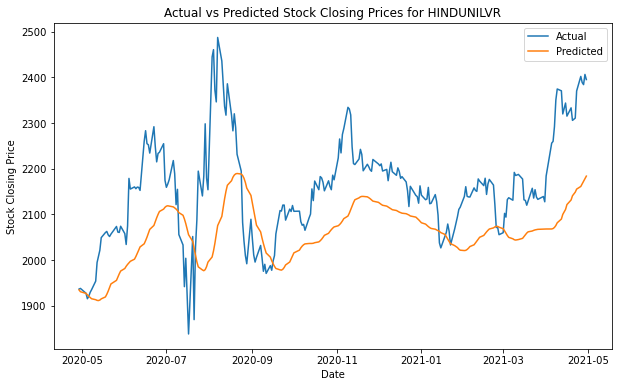

Epoch 1/10
29/29 [==============================] - 7s 88ms/step - loss: 0.0309 - val_loss: 0.0371
Epoch 2/10
29/29 [==============================] - 1s 37ms/step - loss: 0.0073 - val_loss: 8.0096e-04
Epoch 3/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0060 - val_loss: 0.0043
Epoch 4/10
29/29 [==============================] - 1s 34ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 5/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0057 - val_loss: 0.0039
Epoch 6/10
29/29 [==============================] - 1s 34ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 7/10
29/29 [==============================] - 1s 35ms/step - loss: 0.0054 - val_loss: 7.9370e-04
Epoch 8/10
29/29 [==============================] - 1s 34ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 9/10
29/29 [==============================] - 1s 35ms/step - loss: 0.0052 - val_loss: 9.0981e-04
Epoch 10/10
8/8 [==============================] - 1s 11ms/step
Metrics of BRITANNIA:
MSE: 269304

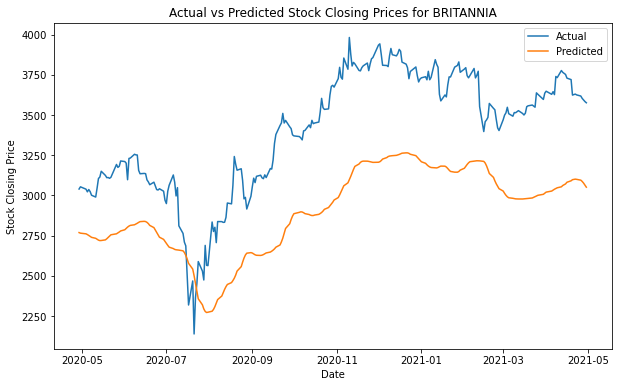

Epoch 1/10
29/29 [==============================] - 6s 62ms/step - loss: 0.0052 - val_loss: 0.0245
Epoch 2/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0012 - val_loss: 0.0106
Epoch 3/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 4/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 5/10
29/29 [==============================] - 1s 29ms/step - loss: 9.1915e-04 - val_loss: 0.0024
Epoch 6/10
29/29 [==============================] - 1s 38ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 7/10
29/29 [==============================] - 1s 33ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 8/10
29/29 [==============================] - 1s 30ms/step - loss: 8.3905e-04 - val_loss: 9.5764e-04
Epoch 9/10
29/29 [==============================] - 1s 29ms/step - loss: 8.7138e-04 - val_loss: 0.0063
Epoch 10/10
8/8 [==============================] - 1s 12ms/step
Metrics of NESTLEIND:
MSE: 59

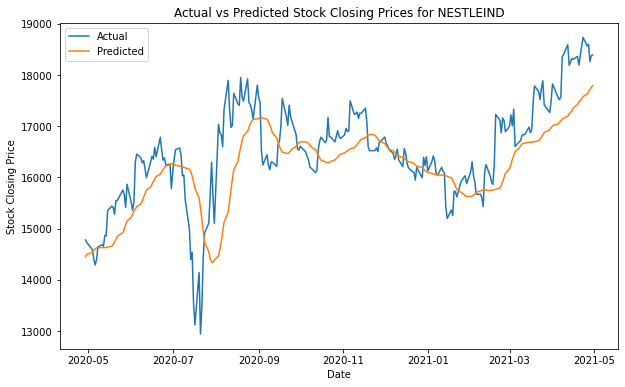

Epoch 1/10
29/29 [==============================] - 6s 59ms/step - loss: 0.0472 - val_loss: 0.0046
Epoch 2/10
29/29 [==============================] - 1s 29ms/step - loss: 0.0137 - val_loss: 0.0020
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 0.0097 - val_loss: 0.0014
Epoch 4/10
29/29 [==============================] - 1s 31ms/step - loss: 0.0092 - val_loss: 0.0016
Epoch 5/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0079 - val_loss: 0.0018
Epoch 6/10
29/29 [==============================] - 1s 32ms/step - loss: 0.0085 - val_loss: 0.0014
Epoch 7/10
29/29 [==============================] - 1s 35ms/step - loss: 0.0080 - val_loss: 0.0035
Epoch 8/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0077 - val_loss: 0.0017
Epoch 9/10
29/29 [==============================] - 1s 30ms/step - loss: 0.0077 - val_loss: 0.0013
Epoch 10/10
8/8 [==============================] - 1s 9ms/step
Metrics of ITC:
MSE: 299.8329517347324, RMSE: 

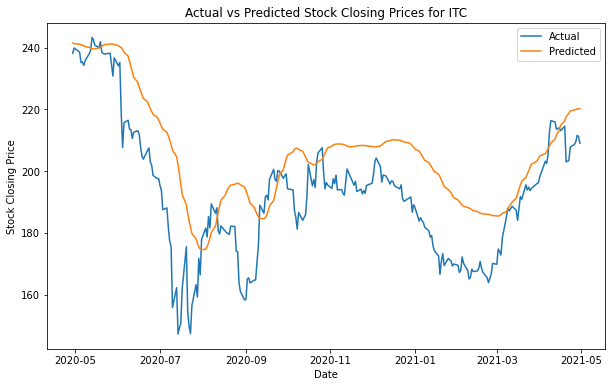

"for symbol, metrics in stock_metrics.items():\n    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')"

In [6]:
# Calculate rolling mean and standard deviation for the 'Close' column
df['50_day_mean'] = df['Close'].rolling(window=50).mean()
df['200_day_mean'] = df['Close'].rolling(window=200).mean()
df['50_day_std'] = df['Close'].rolling(window=50).std()
df['200_day_std'] = df['Close'].rolling(window=200).std()

# Drop rows with NaN values resulting from rolling calculations
df.dropna(inplace=True)

# Define features and target
features = ['Open', 'High', 'Low', 'Close', '50_day_mean', '200_day_mean', '50_day_std', '200_day_std']
target = 'Close'

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Dictionary to store metrics for each stock
stock_metrics = {}

# Process each stock
for symbol in df['Symbol'].unique():
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Scale features
    scaled_features = scaler.fit_transform(stock_df[features])
    scaled_target = scaler.fit_transform(stock_df[[target]])
    
    X, y = [], []
    dates = []  # List to store the corresponding dates for X and y
    time_steps = 30
    for i in range(time_steps, len(stock_df)):
        X.append(scaled_features[i-time_steps:i])
        y.append(scaled_target[i])
        dates.append(stock_df['Date'].iloc[i])  # Store the corresponding date
        
    X=np.array(X)
    y=np.array(y)
    
    # Convert dates list to a NumPy array for easier indexing
    dates = np.array(dates)
    
    '''# Create sequences
    def create_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            Xs.append(X[i:(i + time_steps)])
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)

    time_steps = 30
    X, y = create_dataset(scaled_features, scaled_target, time_steps)'''
    
    # Split into training and testing datasets based on the specified dates
    '''train_mask = stock_df['Date'] < pd.Timestamp('2020-01-01')
    test_mask = (stock_df['Date'] >= pd.Timestamp('2020-01-01')) & (stock_df['Date'] < pd.Timestamp('2021-01-01'))
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]'''
    
    # Now create masks based on the adjusted dates array
    train_mask = dates < pd.Timestamp('2020-01-01')
    test_mask = (dates >= pd.Timestamp('2020-01-01')) & (dates < pd.Timestamp('2021-01-01'))
    
    # Use these masks to split the data
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    
    # Build the LSTM model
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Fit the model
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    '''# Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    nrmse = rmse / (np.max(y_test) - np.min(y_test))
    actual_growth = ((y_test[-1][0] - y_test[0][0]) / y_test[0][0]) * 100
    predicted_growth = ((predictions[-1][0] - predictions[0][0]) / predictions[0][0]) * 100'''
    
    mse, rmse, mae, nrmse, actual_growth, predicted_growth = stockMetrics(y_test, predictions)
    
    # Store metrics
    stock_metrics[symbol] = {
        'MSE': mse,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'Actual Growth %': actual_growth,
        'Predicted Growth %': predicted_growth
    }
    
    print(f'Metrics of {symbol}:')
    print(f'MSE: {mse}, RMSE: {rmse}, NRMSE: {nrmse}, MAE: {mae}, Actual Growth: {actual_growth}, Predicted Growth: {predicted_growth}')
    
    stockActVsPred(stock_df, y_test, predictions)

    '''# Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], y_test, label='Actual')
    plt.plot(stock_df['Date'][len(stock_df)-len(predictions):], predictions, label='Predicted')
    plt.title(f'Actual vs Predicted Stock Closing Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stock Closing Price')
    plt.legend()
    plt.show()'''

# Output metrics for each stock
'''for symbol, metrics in stock_metrics.items():
    print(f'Stock: {symbol}, Metrics: {metrics}', sep = '\n')'''
